# Elementary Education Early Intervention


Problem Statement:<br>
Students are taking three district standard thest every year. However, teachers tend to address issues that students may have towards the later part of the year (usually after the second test). Although this is helpful, it would be more useful if teachers could identify students in need of additional intervention at an earlier stage within the school year. My goal will be to use machine learning to help teachers identify which student needs early intervention after the first test (within the first marking period). This would allow teachers the ability to work with the students in problem areas in hopes of producing higher test scores.

# Import Libraries



In [92]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
def teacher(data, col):
    sns.boxplot(x="Teacher",y=col, data=data)
    plt.show()
    sns.barplot(x="Teacher", y=col, data=data) 
    plt.show()

# FAST Test Scores
<img src="FAST.png" width ="500" />

# Data Ingestion


In [94]:
data = pd.read_excel("Data for Summer Project (1).xlsx")
data

,Student Name,Student Id,Gender,Tardies,Absence,Transfers,Suspended,ESE Primary Exceptionality,Teacher,Ethnicity,...,23/24 FAST PM1 Achievement Level,23/24 FAST PM2 Scale Score,23/24 FAST PM2 Achievement Level,23/24 FAST PM3 Scale Score,23/24 FAST PM3 Achievement Level,Quarter 1 Grade,Quarter 2 Grade,Quarter 3 Grade,Quarter 4 Grade,Final Grade
0,"Addison, Kendrick",20075802,M,1,26,N,0,Specific Learning Disability,Rogers,African American,...,1.0,155.0,1.0,172.0,1.0,0.6,0.61,0.6,0.62,61
1,"Allen, Demetri",20105857,M,0,1,N,0,?,Jenkins,African American,...,1.0,203.0,2.0,206.0,2.0,78.0,78.00,81.0,70.00,77
2,"Arnold, Jackson",20142757,M,0,3,N,0,?,Queen,African American,...,3.0,222.0,4.0,238.0,5.0,91.0,87.00,90.0,90.00,90
3,"Backmon, Blair",20098882,F,1,9,N,0,?,Queen,African American,...,1.0,203.0,2.0,215.0,3.0,70.0,78.00,84.0,93.00,81
4,"Bagley, Zamiyah",20169020,F,1,5,N,0,?,Rogers,African American,...,1.0,197.0,1.0,216.0,3.0,65.0,70.00,70.0,79.00,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,"White, Kaden",20078051,M,0,6,N,0,?,Jenkins,African American,...,1.0,219.0,3.0,225.0,4.0,88.0,89.00,86.0,87.00,88
120,"Williams, Raquelle",20124967,F,0,6,N,0,?,Rogers,African American,...,1.0,195.0,1.0,211.0,3.0,77.0,70.00,72.0,83.00,76
121,"Williams, Skylar",20051569,F,2,6,N,0,?,Queen,African American,...,1.0,206.0,2.0,219.0,3.0,80.0,82.00,78.0,78.00,80
122,"Wilson, Kyleigh",20195531,F,0,5,N,0,?,Jenkins,African American,...,1.0,210.0,2.0,222.0,4.0,90.0,90.00,92.0,81.00,88


In [95]:
data.describe()

,Student Id,Absence,Suspended,22/23 FAST PM3 Scale Score,22/23 FAST PM3 Achievement Level,23/24 FAST PM1 Scale Score,23/24 FAST PM1 Achievement Level,23/24 FAST PM2 Scale Score,23/24 FAST PM2 Achievement Level,23/24 FAST PM3 Scale Score,23/24 FAST PM3 Achievement Level,Quarter 1 Grade,Quarter 2 Grade,Quarter 3 Grade,Quarter 4 Grade,Final Grade
count,1.240000e+02,124.000000,124.000000,108.000000,108.000000,117.000000,117.000000,120.000000,120.000000,123.000000,123.000000,109.000000,113.000000,121.000000,124.000000,124.000000
mean,1.955965e+07,7.564516,0.120968,198.916667,2.842593,187.504274,1.307692,203.983333,2.258333,214.528455,2.967480,80.390826,79.067345,79.690909,79.803387,80.040323
std,3.171163e+06,7.583939,0.832205,21.490761,1.185284,17.628163,0.622309,18.775535,1.118942,20.594972,1.279952,13.783280,13.839798,13.789730,14.020134,10.976989
min,0.000000e+00,0.000000,0.000000,140.000000,1.000000,155.000000,1.000000,155.000000,1.000000,155.000000,1.000000,0.600000,0.610000,0.600000,0.620000,54.000000
25%,2.008003e+07,2.750000,0.000000,190.000000,2.000000,178.000000,1.000000,196.000000,1.000000,205.000000,2.000000,74.000000,73.000000,72.000000,71.000000,72.000000
50%,2.010112e+07,6.000000,0.000000,202.000000,3.000000,191.000000,1.000000,206.000000,2.000000,217.000000,3.000000,83.000000,81.000000,82.000000,81.000000,81.000000
75%,2.011207e+07,9.000000,0.000000,214.250000,4.000000,199.000000,1.000000,216.250000,3.000000,226.500000,4.000000,91.000000,89.000000,89.000000,90.000000,88.000000
max,2.023824e+07,35.000000,9.000000,238.000000,5.000000,229.000000,4.000000,255.000000,5.000000,265.000000,5.000000,98.000000,97.000000,100.000000,101.000000,97.000000


# Analysis of the Data

In [96]:
data.head()

,Student Name,Student Id,Gender,Tardies,Absence,Transfers,Suspended,ESE Primary Exceptionality,Teacher,Ethnicity,...,23/24 FAST PM1 Achievement Level,23/24 FAST PM2 Scale Score,23/24 FAST PM2 Achievement Level,23/24 FAST PM3 Scale Score,23/24 FAST PM3 Achievement Level,Quarter 1 Grade,Quarter 2 Grade,Quarter 3 Grade,Quarter 4 Grade,Final Grade
0,"Addison, Kendrick",20075802,M,1,26,N,0,Specific Learning Disability,Rogers,African American,...,1.0,155.0,1.0,172.0,1.0,0.6,0.61,0.6,0.62,61
1,"Allen, Demetri",20105857,M,0,1,N,0,?,Jenkins,African American,...,1.0,203.0,2.0,206.0,2.0,78.0,78.00,81.0,70.00,77
2,"Arnold, Jackson",20142757,M,0,3,N,0,?,Queen,African American,...,3.0,222.0,4.0,238.0,5.0,91.0,87.00,90.0,90.00,90
3,"Backmon, Blair",20098882,F,1,9,N,0,?,Queen,African American,...,1.0,203.0,2.0,215.0,3.0,70.0,78.00,84.0,93.00,81
4,"Bagley, Zamiyah",20169020,F,1,5,N,0,?,Rogers,African American,...,1.0,197.0,1.0,216.0,3.0,65.0,70.00,70.0,79.00,71


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Student Name                      124 non-null    object 
 1   Student Id                        124 non-null    int64  
 2   Gender                            124 non-null    object 
 3   Tardies                           124 non-null    object 
 4   Absence                           124 non-null    int64  
 5   Transfers                         124 non-null    object 
 6   Suspended                         124 non-null    int64  
 7   ESE Primary Exceptionality        124 non-null    object 
 8   Teacher                           124 non-null    object 
 9   Ethnicity                         124 non-null    object 
 10  22/23 FAST PM3 Scale Score        108 non-null    float64
 11  22/23 FAST PM3 Achievement Level  108 non-null    float64
 12  23/24 FA

In [98]:
data.columns

Index(['Student Name', 'Student Id', 'Gender', 'Tardies', 'Absence',
       'Transfers', 'Suspended', 'ESE Primary Exceptionality', 'Teacher',
       'Ethnicity', '22/23 FAST PM3 Scale Score',
       '22/23 FAST PM3 Achievement Level', '23/24 FAST PM1 Scale Score',
       '23/24 FAST PM1 Achievement Level', '23/24 FAST PM2 Scale Score',
       '23/24 FAST PM2 Achievement Level', '23/24 FAST PM3 Scale Score',
       '23/24 FAST PM3 Achievement Level', 'Quarter 1 Grade',
       'Quarter 2 Grade', 'Quarter 3 Grade', 'Quarter 4 Grade', 'Final Grade'],
      dtype='object')

# Exploratory Data Analysis

## Missing Values

In [99]:
data.isnull().sum()

Student Name                         0
Student Id                           0
Gender                               0
Tardies                              0
Absence                              0
Transfers                            0
Suspended                            0
ESE Primary Exceptionality           0
Teacher                              0
Ethnicity                            0
22/23 FAST PM3 Scale Score          16
22/23 FAST PM3 Achievement Level    16
23/24 FAST PM1 Scale Score           7
23/24 FAST PM1 Achievement Level     7
23/24 FAST PM2 Scale Score           4
23/24 FAST PM2 Achievement Level     4
23/24 FAST PM3 Scale Score           1
23/24 FAST PM3 Achievement Level     1
Quarter 1 Grade                     15
Quarter 2 Grade                     11
Quarter 3 Grade                      3
Quarter 4 Grade                      0
Final Grade                          0
dtype: int64

Provide explanation, note the approach on missing  values

## Data Visualization

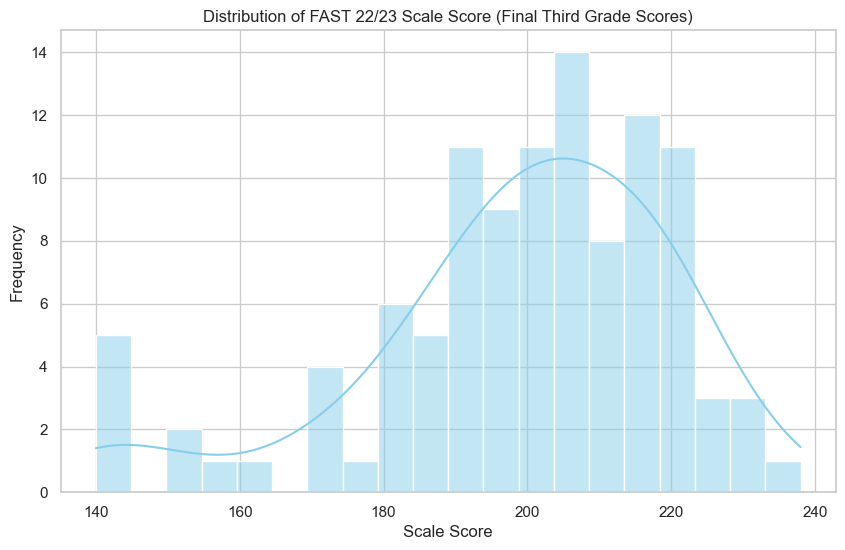

In [100]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['22/23 FAST PM3 Scale Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of FAST 22/23 Scale Score (Final Third Grade Scores)' )
plt.xlabel('Scale Score')
plt.ylabel('Frequency')
plt.show()

This data represents the final scale scores from the previous year. We see that the distribution is left skewed meaning that most of the activity seems to be taking place from 180-220. These values represent the final scores after all intervention strategies were implemented. It shows that average scores fall bewtween 200-210. Also seeing that 33% of the test takers scored a below a level 3 (140-197). We also see that 58% of the test takers scored at a level 3 or above (198-260).

<Axes: xlabel='Gender', ylabel='22/23 FAST PM3 Scale Score'>

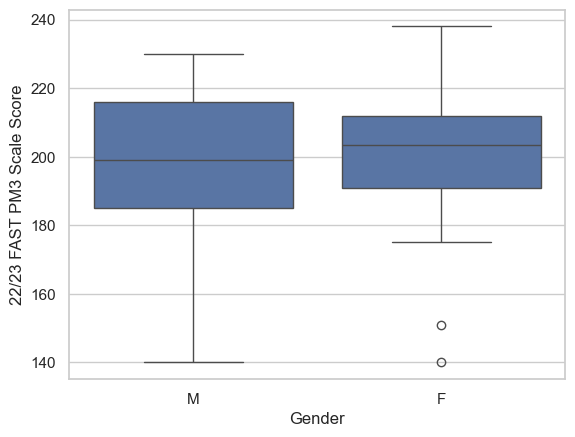

In [101]:
sns.boxplot(x="Gender",y="22/23 FAST PM3 Scale Score", data=data)

We can see that the average FAST score for male students was about 198 which represents the low end of a level 3 (198 -260). We can also see that score ranges for male fall between 185(level 2) to 210 (level 3). WE can also see that  there are no outliers for the male students and the lowest score is 140 (low level 1). Finally we see the highest score for any male student was 230 which represents the hifher end of a level 3.

For female studnets we see that the average scores sits around 210 (mid level 3 range). We also notice a concentration of scores between 190-205 (all level 3 ranges)

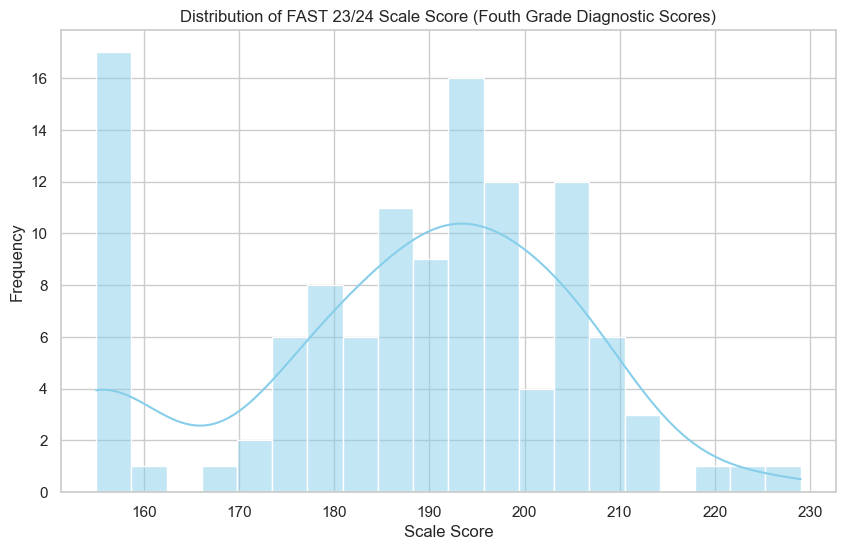

In [102]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['23/24 FAST PM1 Scale Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of FAST 23/24 Scale Score (Fouth Grade Diagnostic Scores)' )
plt.xlabel('Scale Score')
plt.ylabel('Frequency')
plt.show()

Before interpreting this diagram it is important for us to know a few things.<br>
1. These are the same students from third grade but starting their fourth grade year<br>
2. This data represents skills from fourth grade content and only used to gauge readiness. <br>

Now after reviewing the data, we see that 43% of test takes scored below a level 1 (155-199). This makes sense as for many of these students this is their first time working with fourth grade concepts. This is also the begining of a new school year so students are comming for a long summer break. We also see that 5% of test takers scored above a level 3 on the diagnositc.

<Axes: xlabel='Gender', ylabel='23/24 FAST PM1 Scale Score'>

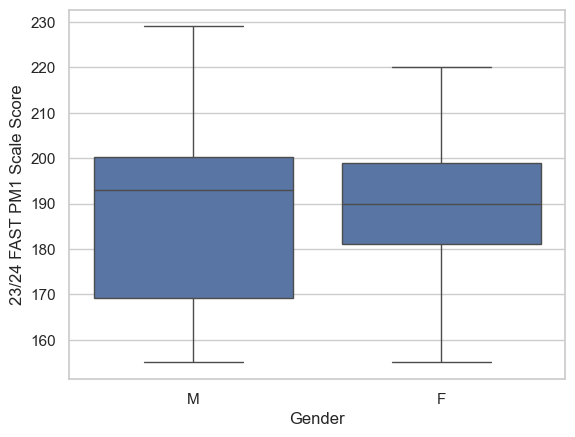

In [103]:
sns.boxplot(x="Gender",y="23/24 FAST PM1 Scale Score", data=data) 

In [104]:
data.columns

Index(['Student Name', 'Student Id', 'Gender', 'Tardies', 'Absence',
       'Transfers', 'Suspended', 'ESE Primary Exceptionality', 'Teacher',
       'Ethnicity', '22/23 FAST PM3 Scale Score',
       '22/23 FAST PM3 Achievement Level', '23/24 FAST PM1 Scale Score',
       '23/24 FAST PM1 Achievement Level', '23/24 FAST PM2 Scale Score',
       '23/24 FAST PM2 Achievement Level', '23/24 FAST PM3 Scale Score',
       '23/24 FAST PM3 Achievement Level', 'Quarter 1 Grade',
       'Quarter 2 Grade', 'Quarter 3 Grade', 'Quarter 4 Grade', 'Final Grade'],
      dtype='object')

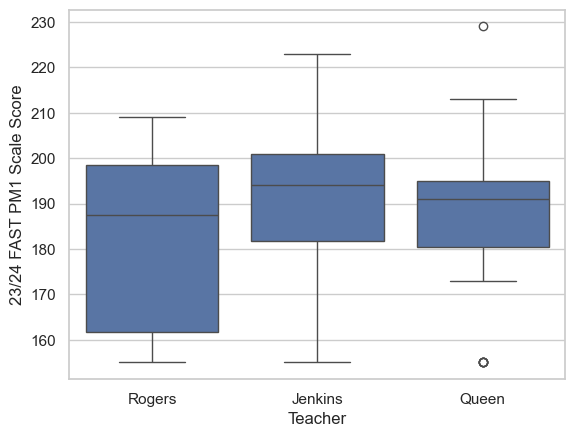

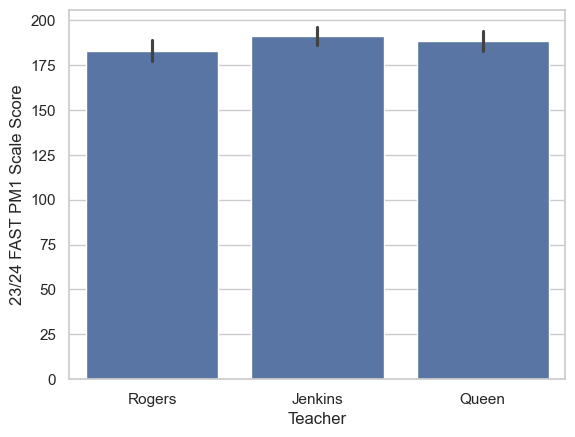

In [105]:
teacher(data, '23/24 FAST PM1 Scale Score')

In [108]:
scores =['23/24 FAST PM1 Scale Score', '23/24 FAST PM2 Scale Score', '23/24 FAST PM3 Scale Score']

column name: 23/24 FAST PM1 Scale Score


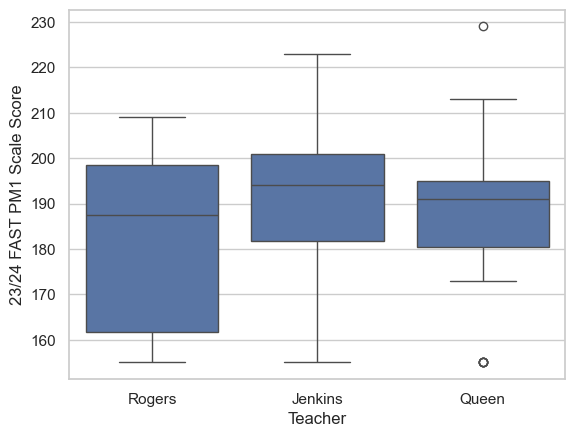

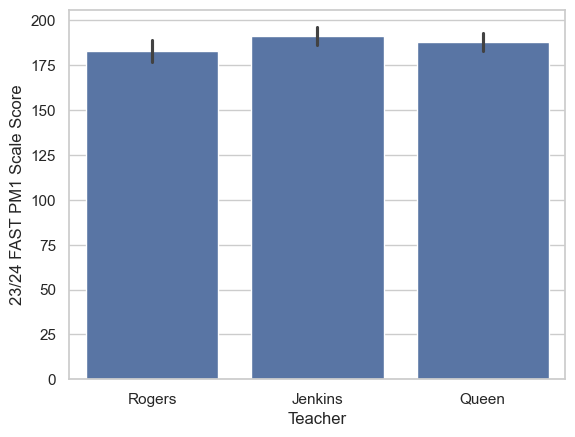

column name: 23/24 FAST PM2 Scale Score


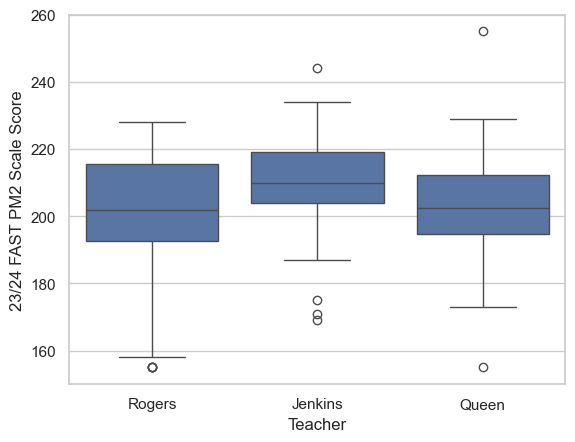

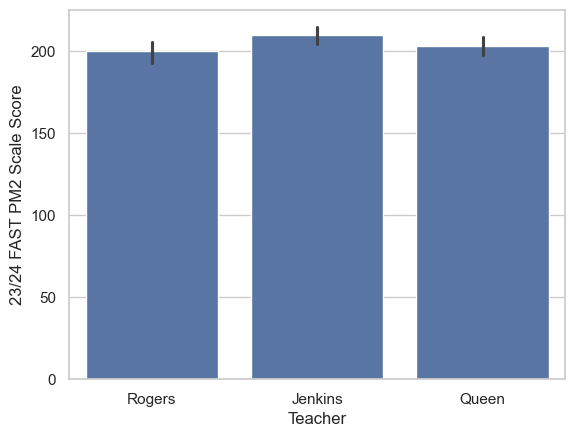

column name: 23/24 FAST PM3 Scale Score


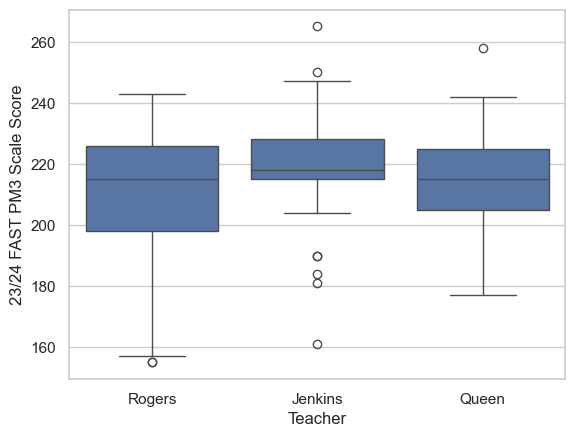

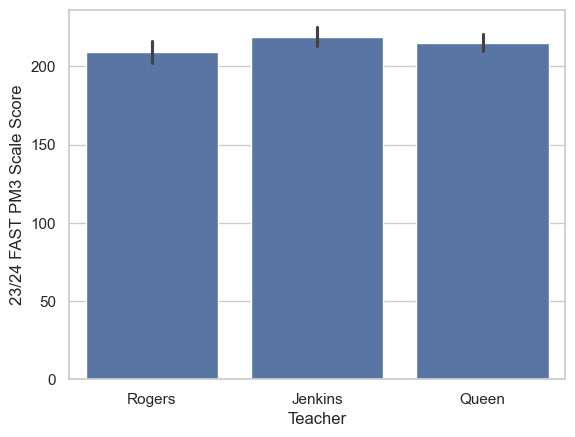

In [109]:
#teacher(data, scores)
for i in scores:
    print("column name:", i)
    teacher(data, i)

## Corelation Analysis


## Data Preprocessing

### Encoding

### Scaling